# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [47]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [48]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import random
#indices = random.sample(range(data.shape[0]), 3)
indices = [252, 110, 313]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
print indices
display(samples) # [252, 110, 313]

Chosen samples of wholesale customers dataset:
[252, 110, 313]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6623,1860,4740,7683,205,1693
1,11818,1648,1694,2276,169,1647
2,9784,925,2405,4447,183,297


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**  
 * Intuitive speculation
  - It was confirmed that for all items of all samples, as shown in the graph below, roughly 1 Sigma fits. Therefore, it is not a specially deviated sample from the overall average value, it is a general facility, and discussions will be made on the premise below.
  - In sample 0, we order the most in all items except fresh food, so it can be said that it is a large store. And, perhaps because it is buying a lot of things other than fresh food, there may be another supplier of fresh food.
  - Sample 1 is buying more fresh food than any other customer. So it is rather a shop near the grocery store or fresh fish shop, so it's a community-based shop, it may be a store with concepts that put only items with good product turning.
  - In sample 2, demand for milk and delicatessen is less than for other customers. Cafes and others require a lot of milk, but delicatessen is not much needed. Perhaps the reason why milk is small may be because newcomers made a mistake and asked too much last week.

From the box-and-whisker plot below, we can confidently say that in the detergents paper, three of them are same, but in the other features it seems like not ordered.

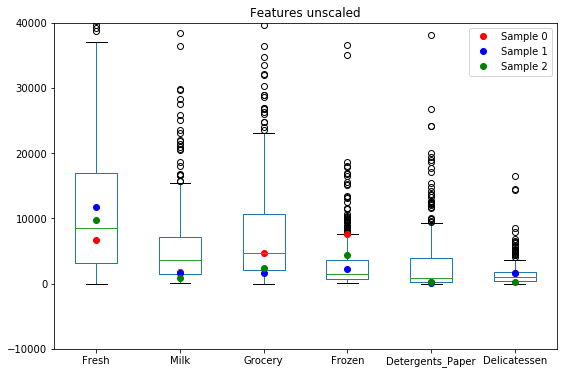

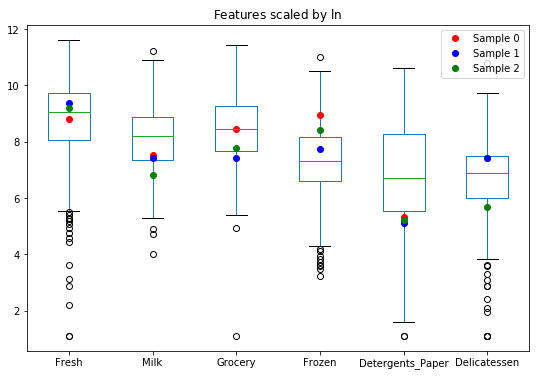

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=[9,6])
ax=plt.subplot(111)
data.plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(samples[d]))+i
    ax.plot(x[0],samples[d][0],'ro',label='Sample 0')
    ax.plot(x[1],samples[d][1],'bo',label='Sample 1')
    ax.plot(x[2],samples[d][2],'go',label='Sample 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3],loc='upper right')

ax.set_ylim(-10000,40000)
ax.set_title('Features unscaled')

plt.figure(figsize=[9,6])
ax=plt.subplot(111)
np.log(data).plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(samples[d]))+i
    ax.plot(x[0],np.log(samples[d][0]),'ro',label='Sample 0')
    ax.plot(x[1],np.log(samples[d][1]),'bo',label='Sample 1')
    ax.plot(x[2],np.log(samples[d][2]),'go',label='Sample 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3],loc='upper right')
ax.set_title(r'Features scaled by $\ln$')

# ax.set_ylim(-10000,40000)

In [50]:
display(samples.sum())

Fresh               28225
Milk                 4433
Grocery              8839
Frozen              14406
Detergents_Paper      557
Delicatessen         3637
dtype: int64

 * The Statistical description of the dataset above for your sample customers.  
 I think these customer's mean are in at least over the 25% of the statistical data from the hole data of customers, so these sample customers are normal sample.

In [51]:
display(samples.describe())
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,9408.333333,1477.666667,2946.333333,4802.000000,185.666667,1212.333333
std,2617.794937,490.220699,1593.521363,2720.924659,18.147543,793.035518
min,6623.000000,925.000000,1694.000000,2276.000000,169.000000,297.000000
25%,8203.500000,1286.500000,2049.500000,3361.500000,176.000000,972.000000
50%,9784.000000,1648.000000,2405.000000,4447.000000,183.000000,1647.000000
75%,10801.000000,1754.000000,3572.500000,6065.000000,194.000000,1670.000000
max,11818.000000,1860.000000,4740.000000,7683.000000,205.000000,1693.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


 * What kind of establishment could each of the three samples you've chosen represent?  
 They did not buy the detergents paper, so they are only come to market to buy food making some dinner or from restrant as a chief. 

 * Discribe samples in the hole data.

In [52]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6623,1860,4740,7683,205,1693
1,11818,1648,1694,2276,169,1647
2,9784,925,2405,4447,183,297


 * Diagram  
 Here is the histgram of the hole data, and add text in samples position.  
 The table below calculates how many times the extracted sample is multiplied by the standard deviation of the total data. Alpha is from sample = mean + alpha * sigma.

0     6623
1    11818
2     9784
Name: Fresh, dtype: int64


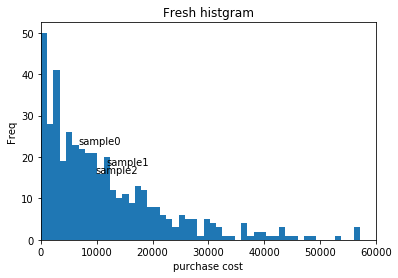

In [53]:
import matplotlib.pyplot as plt
category = "Fresh"
print(samples[category])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data[category], bins=100)
ax.set_title(category + " histgram")
ax.set_xlabel("purchase cost")
ax.set_ylabel("Freq")
ax.set_xlim(0, 60000)
ax.text(samples[category][0], 23, "sample0")
ax.text(samples[category][1], 18, "sample1")
ax.text(samples[category][2], 16, "sample2")
fig.show()

 |Fresh|sample0|sample1|sample2|
 |:---|---:|---:|---:|
 |alpha|1.06|0.92|0.14|

0    1860
1    1648
2     925
Name: Milk, dtype: int64


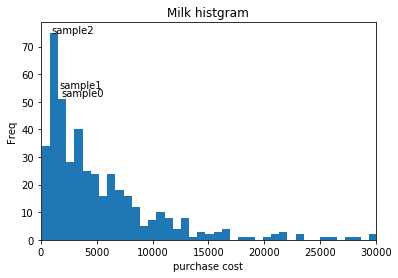

In [54]:
category = "Milk"
print(samples[category])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data[category], bins=100)
ax.set_title(category + " histgram")
ax.set_xlabel("purchase cost")
ax.set_ylabel("Freq")
ax.set_xlim(0, 30000)
ax.text(samples[category][0], 52, "sample0")
ax.text(samples[category][1], 55, "sample1")
ax.text(samples[category][2], 75, "sample2")
fig.show()

 |Milk|sample0|sample1|sample2|
 |:---|---:|---:|---:|
 |alpha|0.78|0.35|1.13|

0    4740
1    1694
2    2405
Name: Grocery, dtype: int64


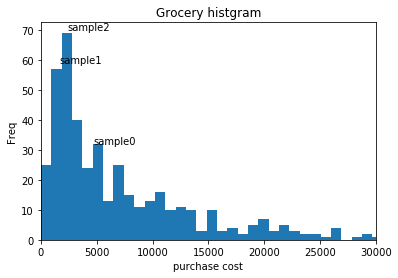

In [55]:
category = "Grocery"
print(samples[category])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data[category], bins=100)
ax.set_title(category + " histgram")
ax.set_xlabel("purchase cost")
ax.set_ylabel("Freq")
ax.set_xlim(0, 30000)
ax.text(samples[category][0], 32, "sample0")
ax.text(samples[category][1], 59, "sample1")
ax.text(samples[category][2], 70, "sample2")
fig.show()

 |Grocery|sample0|sample1|sample2|
 |:---|---:|---:|---:|
 |alpha|1.13|0.79|0.34|

0    7683
1    2276
2    4447
Name: Frozen, dtype: int64


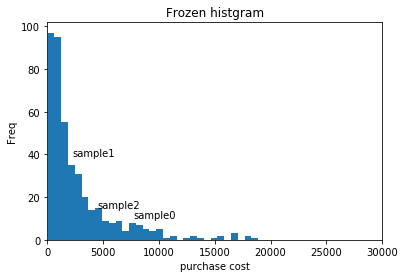

In [56]:
category = "Frozen"
print(samples[category])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data[category], bins=100)
ax.set_title(category + " histgram")
ax.set_xlabel("purchase cost")
ax.set_ylabel("Freq")
ax.set_xlim(0, 30000)
ax.text(samples[category][0], 10, "sample0")
ax.text(samples[category][1], 39, "sample1")
ax.text(samples[category][2], 15, "sample2")
fig.show()

 |Frozen|sample0|sample1|sample2|
 |:---|---:|---:|---:|
 |alpha|1.06|0.93|0.13|

0    205
1    169
2    183
Name: Detergents_Paper, dtype: int64


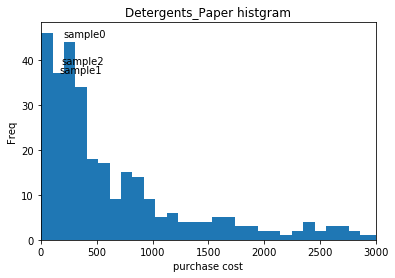

In [57]:
category = "Detergents_Paper"
print(samples[category])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data[category], bins=400)
ax.set_title(category + " histgram")
ax.set_xlabel("purchase cost")
ax.set_ylabel("Freq")
ax.set_xlim(0, 3000)
ax.text(samples[category][0], 45, "sample0")
ax.text(samples[category][1], 37, "sample1")
ax.text(samples[category][2], 39, "sample2")
fig.show()

 |Detergents_Papser|sample0|sample1|sample2|
 |:---|---:|---:|---:|
 |alpha|1.07|0.92|0.15|

0    1693
1    1647
2     297
Name: Delicatessen, dtype: int64


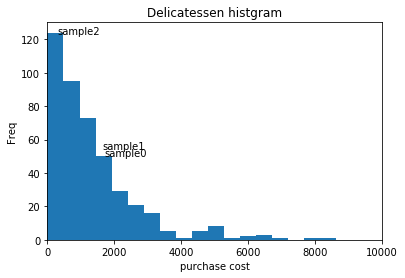

In [58]:
category = "Delicatessen"
print(samples[category])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data[category], bins=100)
ax.set_title(category + " histgram")
ax.set_xlabel("purchase cost")
ax.set_ylabel("Freq")
ax.set_xlim(0, 10000)
ax.text(samples[category][0], 50, "sample0")
ax.text(samples[category][1], 54, "sample1")
ax.text(samples[category][2], 123, "sample2")
fig.show()

 |Delicatessen|sample0|sample1|sample2|
 |:---|---:|---:|---:|
 |alpha|0.61|0.55|1.15|

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [59]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
dropIndexes = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]
d_score = dict(names = dropIndexes)

for _dropIndex in dropIndexes:
    new_data = data.drop(_dropIndex, axis=1)

    d_score[_dropIndex] = []
    for _random_state in range(100):
        # TODO: Split the data into training and testing sets using the given feature as the target
        from sklearn.cross_validation import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(new_data, data[_dropIndex], test_size=0.25, random_state=_random_state)

        # TODO: Create a decision tree regressor and fit it to the training set
        from sklearn.tree import DecisionTreeRegressor
        regressor = DecisionTreeRegressor()
        regressor.fit(X_train, y_train)
        pred = regressor.predict(X_test)
    
        # TODO: Report the score of the prediction using the testing set
        from sklearn.metrics import accuracy_score
        #score = accuracy_score(pred, y_test)
        score = regressor.score(X_test, y_test)
        d_score[_dropIndex].append(score)
    np_score = np.asarray(d_score[_dropIndex])
    print(_dropIndex + ":" + str(np_score.mean()))


Fresh:-0.667883435244
Milk:0.124386597422
Grocery:0.669265319419
Frozen:-1.22952992906
Detergents_Paper:0.689760344105
Delicatessen:-2.58801883326


In [60]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

 * Which feature did you attempt to predict?  
  I tried to make sure all the feature are worth the prediction.

 * What was the reported prediction score?
 The score of prediction R^2 are somehow different between the data. The most correlated feature is surprisingly "Detergents_Paper", the score is 0.67. I will show all of R^2 score below.
  1. Detergents_Paper:0.69
  2. Grocery:0.68 (Almost same as a Detergents Paper)
  3. Fresh:-0.65
  4. Milk:0.11
  5. Frozen:-1.35 (I think this occurred for not to be able to fit.) 
  6. Delicatessen:-2.57 (I think this occurred for not to be able to fit.) 

 * Is this feature is necessary for identifying customers' spending habits?
 In case of highly coressponding data can make it not necessary data, I think, because the value of that feature is predictable so machine don't need that. On the contrary, I think that functions with low correlation are necessary, because the value of that feature is not predictable.    
 According to this, the data of Detergents paper and/or Grocery are not necessary for us.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

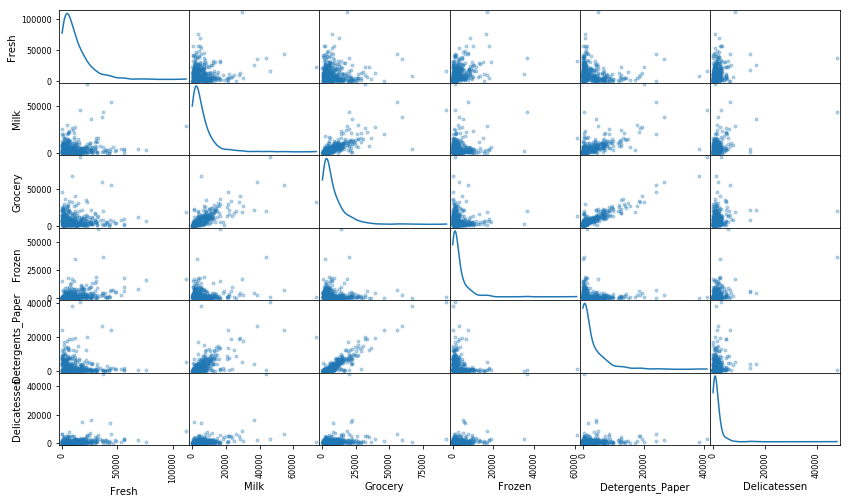

In [61]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

 * Are there any pairs of features which exhibit some degree of correlation?  
 I could find the correlation in;  
  - Grocery vs Milk
  - Detergents_paper vs Milk
  - Detergents_paper vs Grocery.

 * Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?  
 Yes, but in my suspicions there are no Milk to concern the correlation, so we can add Milk under consideration from this scatter plot.

 * How is the data for those features distributed?  
 Some of these looks like ordered to be correlation, but the others seems like not ordered for correlation. And for all the items in this time, the data distribution appears to be biased to one side starting from 0. Therefore, the median and average values ​​tend to be different.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

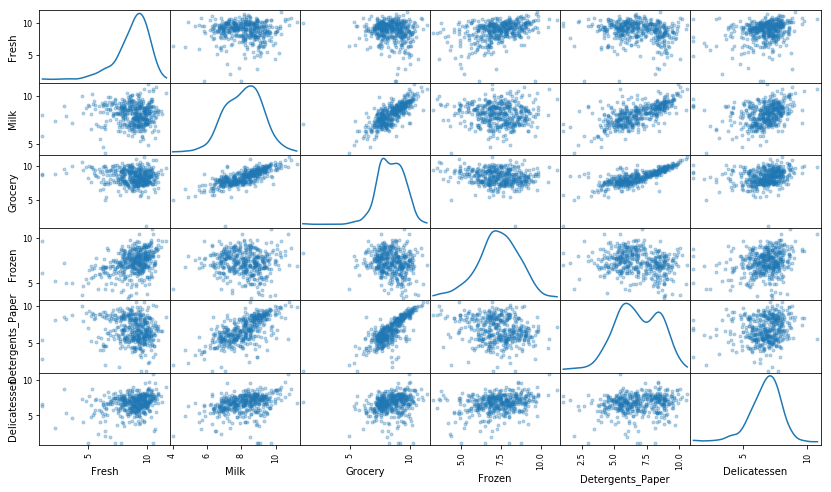

In [62]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [63]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.798304,7.528332,8.463792,8.946765,5.323010,7.434257
1,9.377379,7.407318,7.434848,7.730175,5.129899,7.406711
2,9.188504,6.829794,7.785305,8.399985,5.209486,5.693732


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [64]:
print(log_data.index[0])

0


In [65]:
_outlier = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    _outlier.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist())
    
# OPTIONAL: Select the indices for data points you wish to remove
from collections import Counter
cnt = Counter(_outlier)

print(cnt)
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

 * Are there any data points considered outliers for more than one feature based on the definition above?  
   - 65 is the outlier in Fresh and Frozen
   - 66 is the outlier in Fresh and Delicatessen
   - 75 is the outlier in Grocery and Detergents_Paper
   - 128 is the outlier in Fresh and Delicatessen
   - 154 is the outlier in Milk, Grocery and Delicatessen

![image1](outlier.jpg)

 * Should these data points be removed from the dataset?  
 Let me consider under [this link](http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/).
 1. These data is maybe corrected by the record of cash register, nowaday the price can be obtained from the bar code, so I think this not happen in this dataset.
 2. Now it has not checked the effect to the result to delete these data, so we just store these outlier.
 3. Same as 2, we have not check to delete these outliers, so we store these points.
 4. Same as 2, we have not check to delete these outliers, so we store these points.
 The 154 data point is most likely outlier, however I store it and check the result of regression.

 * If any data points were added to the outliers list to be removed, explain why.  
 No, because these suspicious data looks like no error value.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[[ 1.49434754 -1.0848839   1.21771261  0.6292686   0.19443122 -0.68469841]
 [ 2.04878507 -0.77513464  0.53470143 -0.56667089 -0.09319232  0.05286144]
 [ 2.39653599 -0.03313019 -0.2992454   0.92033791 -0.12269756 -0.49692884]]


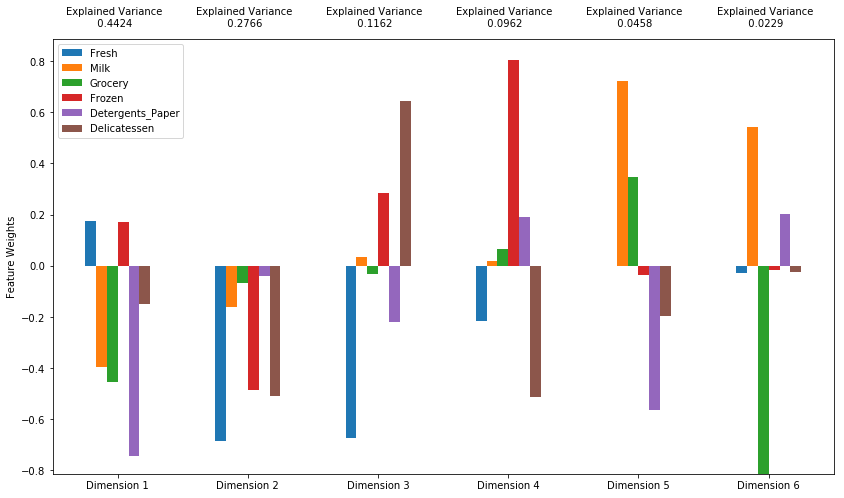

In [66]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
print(pca_samples)

# Generate PCA results plot
pca_results = vs.pca_results(log_samples, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

 * How much variance in the data is explained in total by the first and second principal component?  
   - Dimension 1 : 0.44
   - Dimension 2 : 0.28
   - Total in 1, 2 : 0.72

In [67]:
print pca_results["Explained Variance"].cumsum()

Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64


 * What about the first four principal components?
  - Dimension 1 : High weights in Milk, Grocery and Detergents_Paper. This dimension shows that these are the set of easy buying for customers.
  - Dimension 2 : Relatively high weights in Fresh, Frozen and Delicatessen. This dimension shows that the customer who buy the delicatessan, he don't buy Fresh foods.
  - Dimension 3 : Relatively high weights in Fresh and Delicatessen, and high weights in Frozen and Detergents Paper. This dimension shows that the customer who buy the Delicatessan and Frozen, he don't buy Fresh foods.
  - Dimension 4 : Relatively high weights in Frozen and Delicatessen, and high weights in Fresh and Detergents Paper. This dimension shows that the customer who just buy the Frozen, he don't buy Delicatessan and Fresh foods.

 * Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.  
 The first four dimensions include the 93% of information, and if we use the old features we can get 100% information from data, but we need to consider about 6 dimention to get customer needs that is wasteful. However, by using pca to get the effective feature, we can avoid the curse of dimension also with less loss of information.  
 Also in the detailed information of each dimension above is looks like cover our customers.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [68]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.4943,-1.0849,1.2177,0.6293,0.1944,-0.6847
1,2.0488,-0.7751,0.5347,-0.5667,-0.0932,0.0529
2,2.3965,-0.0331,-0.2992,0.9203,-0.1227,-0.4969


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [69]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [70]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.4943,-1.0849
1,2.0488,-0.7751
2,2.3965,-0.0331


	Fresh	Milk	Grocery	Frozen	Detergents_Paper	Delicatessen  
0	8.798304	7.528332	8.463792	8.946765	5.323010	7.434257  
1	9.377379	7.407318	7.434848	7.730175	5.129899	7.406711  
2	9.188504	6.829794	7.785305	8.399985	5.209486	5.693732  

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

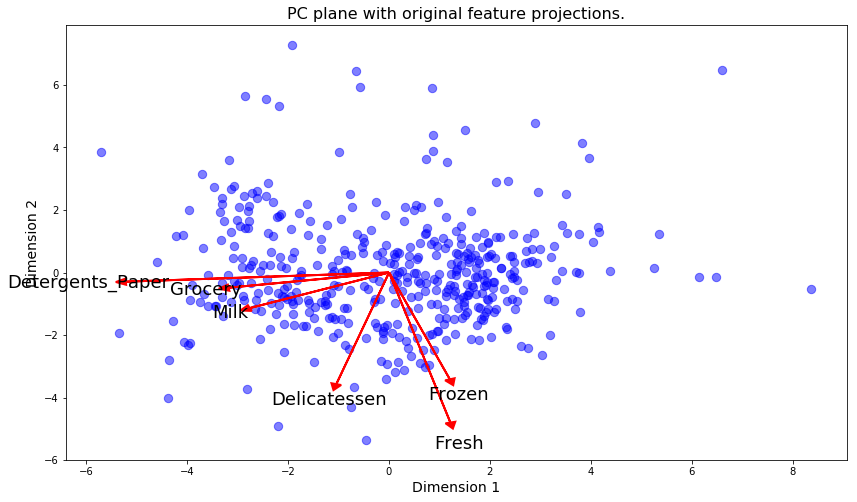

In [71]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

 * What are the advantages to using a K-Means clustering algorithm?  
   - practically work well even some assumptions are broken;
   - simple, easy to implement;
   - easy to interpret the clustering results;
   - fast and efficient in terms of computational cost, typically O(K*n*d);

 * What are the advantages to using a Gaussian Mixture Model clustering algorithm?  
   - each cluster can have unconstrained covariance structure;
   - cluster assignment is much more flexible in GMM than in k-means;

 * Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?  
 GMM  
 Because looking at the data plot, I thought that rather than the intersection of circles, it was rather a collection of data of other shapes. Since K-Means assumes that the collection of data is a circle, I decided to use GMM which can be used in other shapes.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [72]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

for i in range(6, 1, -1):
    #clusterer = KMeans(n_clusters=i)
    clusterer = GaussianMixture (n_components=i, random_state=1)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    #centers = clusterer.cluster_centers_
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    #labels = clusterer.labels_ 
    #score = silhouette_samples(reduced_data, labels)
    score = silhouette_samples(reduced_data, preds)
    title = "Number of Clusters is " + str(i) + ", mean score is " + str(score.mean())
    print(title)
    
    #plot data
    #plt.scatter(score, preds,  color='black')
    #plt.title(title)
    
    #plt.show()

Number of Clusters is 6, mean score is 0.316918685666
Number of Clusters is 5, mean score is 0.296091946266
Number of Clusters is 4, mean score is 0.360894502089
Number of Clusters is 3, mean score is 0.418397819056
Number of Clusters is 2, mean score is 0.410366734627


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
 * Silhouette score means; -1 (dissimilar) to 1 (similar)
 * The number of cluster is 2, our result of above looks like more than 0 to 1, and the shilhouette score is the best from 2 to 20 of number of clasters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [73]:
#clusterer = KMeans(n_clusters=2)
clusterer = GaussianMixture(n_components=3, random_state=1)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
#centers = clusterer.cluster_centers_ 
centers = clusterer.means_
    
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
#labels = clusterer.labels_ 
#score = silhouette_samples(reduced_data, labels)
score = silhouette_samples(reduced_data, preds)


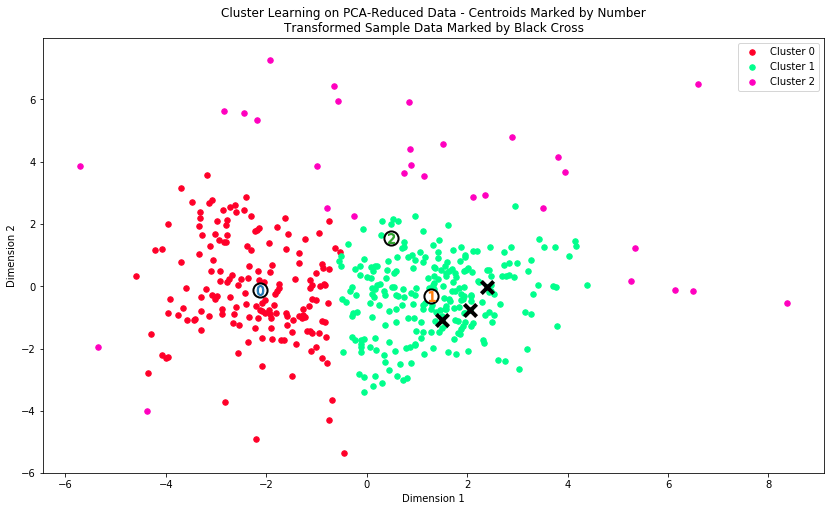

In [74]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [75]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4660.0,7942.0,12282.0,1092.0,4343.0,1149.0
Segment 1,9616.0,2139.0,2649.0,2159.0,346.0,762.0
Segment 2,2343.0,2162.0,3339.0,760.0,578.0,333.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
 * From the scatter diagram on which the cluster was visualized, it was found that each sample was located at a position not far from the center of the cluster, so that it was not a special sample located at the boundary of clustering It was. This is in agreement with the discussion on the premise that all items of all samples in question 1 are within the standard range, and I think that it is a conclusion that supports that premise.
 * Then I thought about further classification of this result so I will write it below.
    - Segment 0 is like cafes or restrants. 
    - Segment 1 is like a cafes or restrants.
    - Segment 2 is like a Fresh food store.  
    - These are because of below.

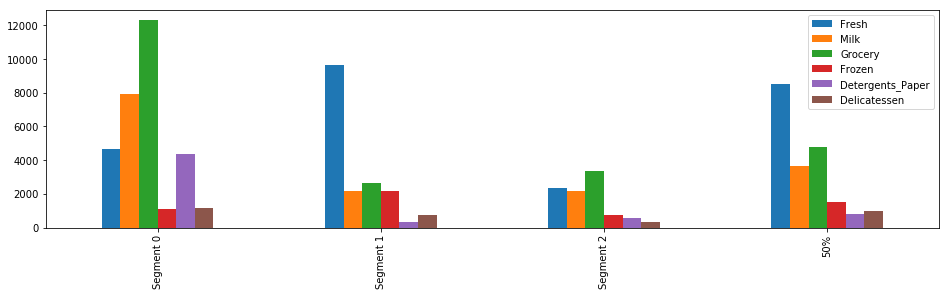

In [76]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

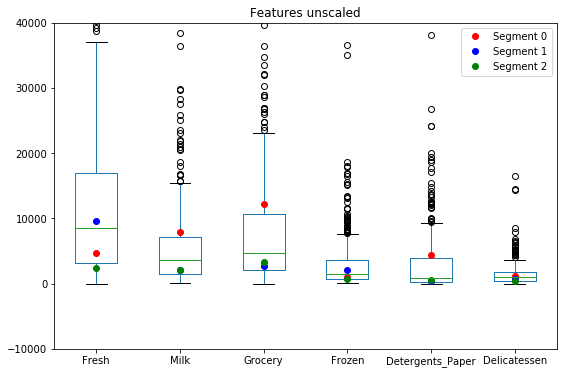

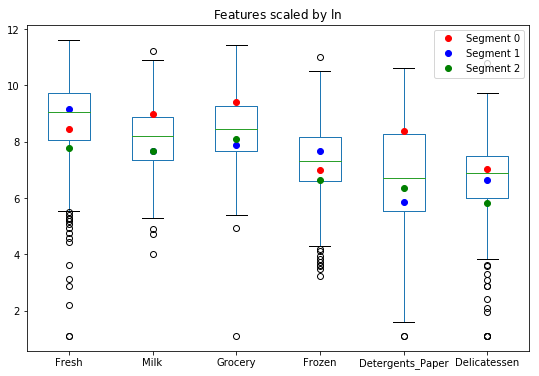

In [77]:
plt.figure(figsize=[9,6])
ax=plt.subplot(111)
data.plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(true_centers[d]))+i
    ax.plot(x[0],true_centers[d][0],'ro',label='Segment 0')
    ax.plot(x[1],true_centers[d][1],'bo',label='Segment 1')
    ax.plot(x[2],true_centers[d][2],'go',label='Segment 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3],loc='upper right')

ax.set_ylim(-10000,40000)
ax.set_title('Features unscaled')

plt.figure(figsize=[9,6])
ax=plt.subplot(111)
np.log(data).plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(true_centers[d]))+i
    ax.plot(x[0],np.log(true_centers[d][0]),'ro',label='Segment 0')
    ax.plot(x[1],np.log(true_centers[d][1]),'bo',label='Segment 1')
    ax.plot(x[2],np.log(true_centers[d][2]),'go',label='Segment 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3],loc='upper right')
ax.set_title(r'Features scaled by $\ln$')

# ax.set_ylim(-10000,40000)

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [78]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**
Question 1 proceeded on the premise that these customers have no particular difference, but the same result was obtained by quantitative clustering this time, and I found that my reasoning was right.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
 * 
I think that A / B test can be carried out by dividing the same segment and conducting the following experiments.
    - In case of  Segment 0, as we found that retailers are seeking a variety of products, we will try to deliver as many kinds of goods as possible to a group as small as possible. And we will send more optimized number of products from the degree of decrease in the number of stocks at retail stores of those merchandise. For example, the period is about one month. Also, compare the groups that have not made those changes, we will check inventory and reduce sales to see if sales have increased.
    - In case of Segment 1 as we found that cafes and restaurants are particularly seeking fresh foods and frozen foods, one group increases fresh foods and increases the number of deliveries. Also, frozen foods will reduce the number of deliveries as much as possible, but we will send them according to the size of the store's refrigerator. The period is, for example, about a month. Also, compare the groups that have not made those changes, we will check inventory and reduce sales to see if sales have increased.
    - In case of Segment 2 as fresh food stores are found to be particularly fresh food, one group will increase the variety of fresh food, but reduce the amount delivered at once and increase the number of deliveries. This is to deliver as much fresh food as possible to the customer. The period is, for example, about a month. Also, compare the groups that have not made those changes, we will check inventory and reduce sales to see if sales have increased.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
 * Once we can add data to cluster then the data can be labeled data for supervised learning. We can train the model with input data with label which provided from unsupervised clustering.
 * We can add the new customers in the cluster using trained model by unsupervised clustering.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

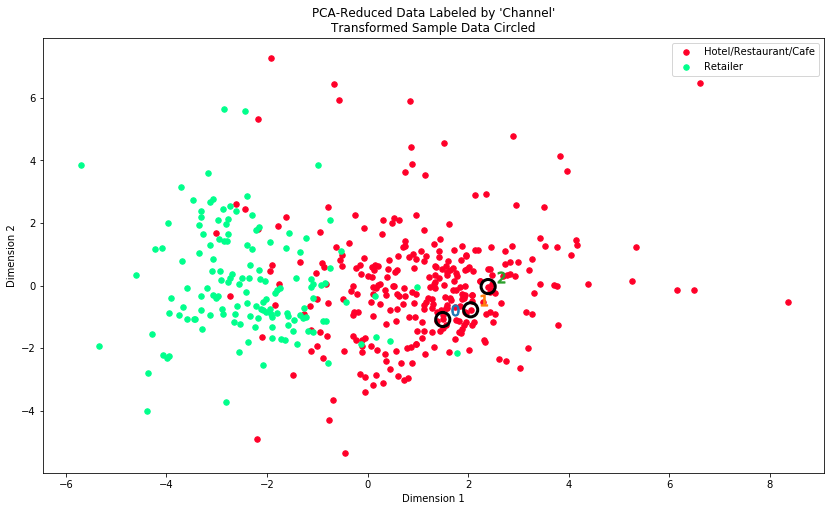

In [79]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  

 * How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?
   - I chose three clusters, so it's one more.

 * Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?
   - Although it seems like that with many data, I think that it is necessary to think about how to describe the mixed part in the center of the scatter plot.

 * Would you consider these classifications as consistent with your previous definition of the customer segments?
   - I think that they agree. However, since my algorithm used the outliers as it is, it may be affecting clustering, but since the number of the cluster (cluster 2) is small, the data I think that it is easy to confirm the details. After that, I believe that you can get the answer to the new clustering after orienting it by checking whether the classification method was correct or not outliers.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.